# THE SPARKS FOUNDATION - GRIP

TASK - Prediction using Supervised ML  (Prediction-using-Supervised-ML Data Science and Business Analytics Task (Predict the percentage of an student based on the no. of study hours) Using simple linear regression model, forecasting the marks of a student based on the numbers of hours studied per day. Tool(s) Used - Python (Jupyter Notebook on Google Colaboratory))

#### Importing Libraries 

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
data=pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# We will check if there is any null value there in the Dataset
data.isnull == True

False

Since there is no null value in the Dataset. We can carry on to visualize our data

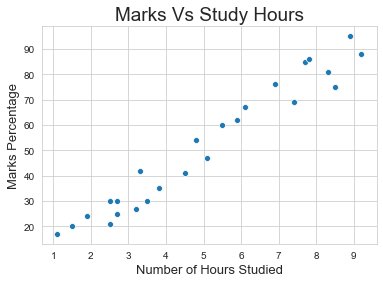

In [5]:
sns.set_style('whitegrid')
sns.scatterplot(y=data['Scores'],x=data['Hours'])
plt.title('Marks Vs Study Hours',size=19)
plt.xlabel('Number of Hours Studied',size=13)
plt.ylabel('Marks Percentage',size=13)
plt.show()

From the above scatter plot there looks to be correlation between the
'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

 

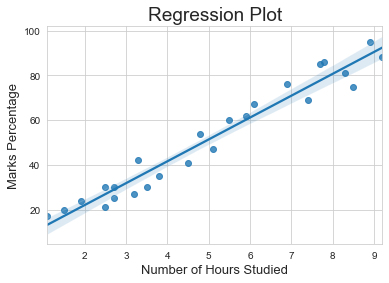

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [6]:
sns.regplot(x=data['Hours'],y=data['Scores'])
plt.title('Regression Plot',size=19)
plt.xlabel('Number of Hours Studied',size=13)
plt.ylabel('Marks Percentage',size=13)
plt.show()
print(data.corr())

#### It is confirmed that the variables are positively correlated####

Training the Model

#### 1) Splitting the Data #### 

In [7]:
# Defining X and Y from the data
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

# Splitting the Data in two
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 0)

#### 2) Fitting the Data into the model ####

In [8]:
regression = LinearRegression()
regression.fit(train_X,train_Y)
print("Model Trained")

Model Trained


####  3) Predicting the Percentage of Marks ####



In [9]:
pred_Y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_Y]})
prediction


,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


Comparing the Predicted Marks with the Actual Marks



In [10]:
compare_scores = pd.DataFrame({'Actual Marks': val_Y, 'Predicted Marks': pred_Y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Visually Comparing the Predicted Marks with the Actual Marks



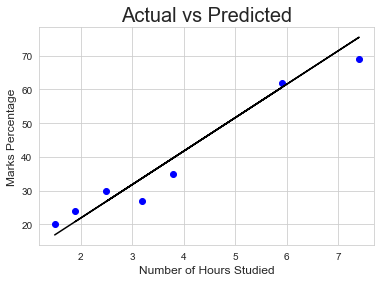

In [11]:
plt.scatter(x=val_X, y=val_Y, color='blue')
plt.plot(val_X, pred_Y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Number of Hours Studied', size=12)
plt.show()

Evaluating the Model

In [12]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_Y,pred_Y))

Mean absolute error:  4.130879918502486


#### Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.####

What will be the predicted score of a student if he/she studies for 9.25 hrs/day?

In [14]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


#### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.893 marks. ####